In [241]:
#impots
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

In [242]:
#carregando os dados
df_dsa = pd.read_csv('dataset.csv')

In [243]:
#shape mostrando o tamanho do dataset, total de linhas e colunas
df_dsa.shape

(9700, 11)

In [244]:
#mostrando as 5 primeiras linhas do dataset
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [245]:
#amostra de as ultimas linhas do dataset
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


Analise Exploratoria

In [246]:
#colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [247]:
#verificando os tipos de dados de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [248]:
#resumo estatístico do dataset
df_dsa.describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


In [249]:
#verficando se a duplicidade existe
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [250]:
#verificando se existem valores ausentes
#se haver valores ausentes deve ser resolvido porque e um problema
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [251]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


Pergunta numero 1:
Qual cidade com Maior Valor de Venda de Produtos de Categoria 'Office Supplies'

In [252]:
#primeiro filtramos o df com os registros desejados
df_dsa_p1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [253]:
#Agrupar os dados por cidade e calcular a soma das vendas
df_dsa_p1_total = df_dsa_p1.groupby('Cidade')['Valor_Venda'].sum()

In [254]:
# Verificar se o dataframe não está vazio antes de usar idxmax
cidade_max_venda = df_dsa_p1_total.idxmax()
print(f'A cidade com maior venda de Office Supplies é: {cidade_max_venda}')

A cidade com maior venda de Office Supplies é: New York City


Pergunta Numero 2 
Qual total de vendas por data do pedido?

In [255]:
#calculando o total de vendas por cada pedido
df_dsa_p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [256]:
df_dsa_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

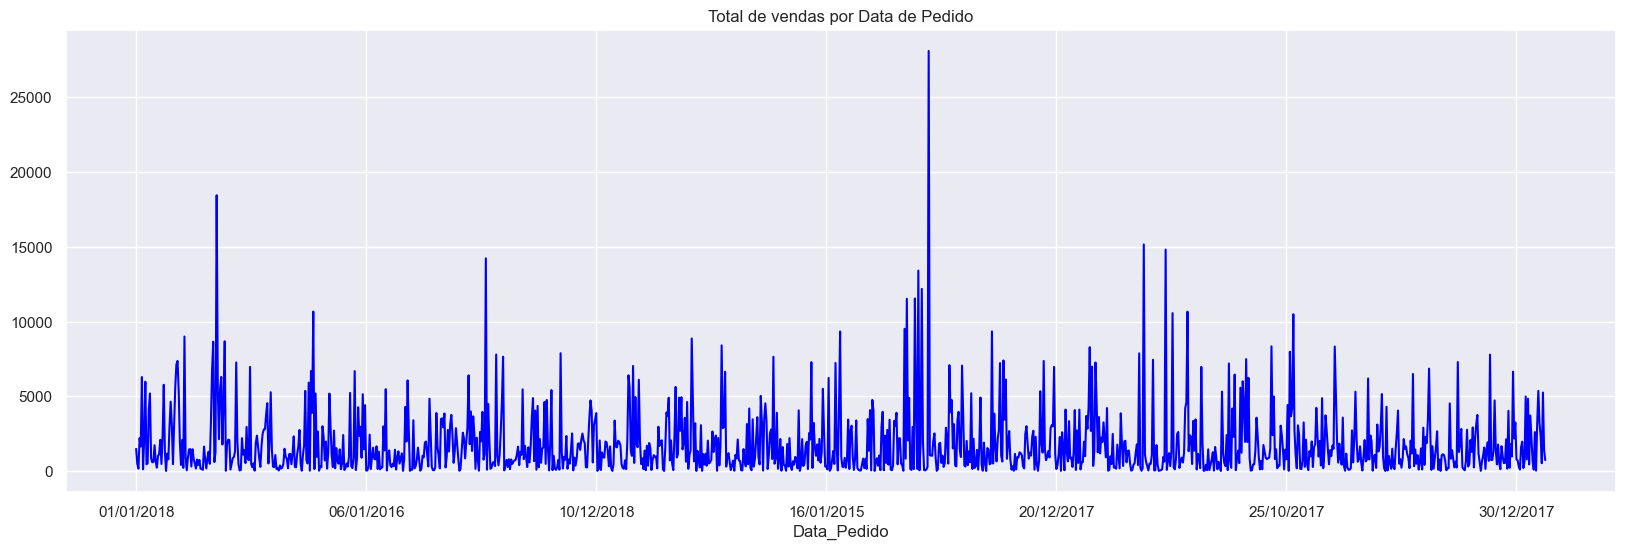

In [257]:
#Plot ou figura, essa alernativa nao e temporarl
#se pergunta fosse ao logo do tempo o script seria outro,convertendo a data para datetime
plt.figure(figsize=(20, 6))
df_dsa_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title('Total de vendas por Data de Pedido')
plt.show()

Pergunta de Negocio 3 
Qual o total de vendas por Estado

In [258]:
#Agrupar por estado e calcularmos o total de vendas
df_dsa_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index() #reset_index()ajuda a criar uma index para nao perder o estado

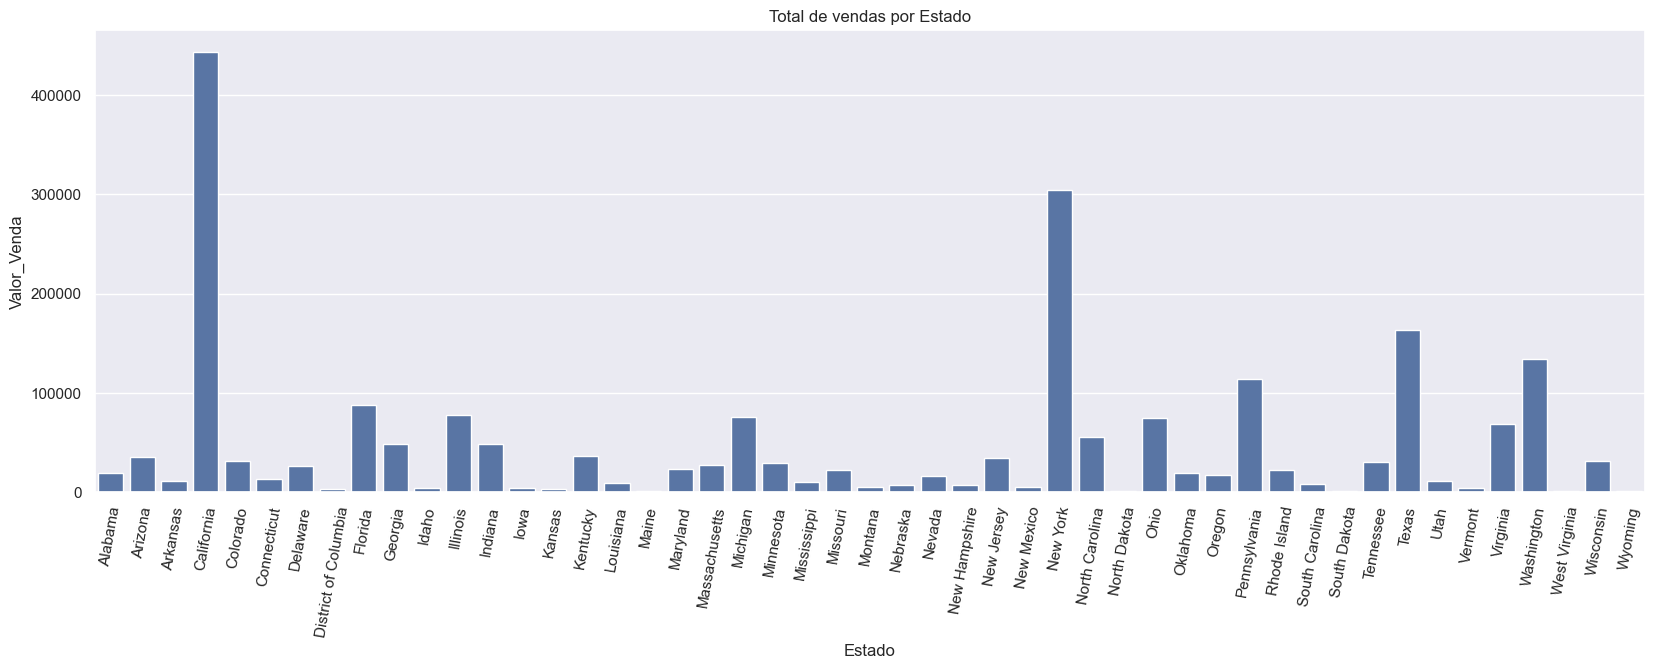

In [259]:
#Plot um grafico mais profissional para relatorios
plt.figure(figsize=(20, 6))
sns.barplot(data = df_dsa_p3,
            y='Valor_Venda',
            x='Estado',).set(title='Total de vendas por Estado')
plt.xticks(rotation= 80) #xticks sao textos do eixo x
plt.show()


Pergunta de Negocio Numero 4
Quais sao as 10 cidades com maior total de vendas?

In [260]:
#Agrupar por cidade, calculamos o total de vendas e ordenamos listando somente as 10 cidades com maior venda
df_dsa_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(10)

In [261]:
df_dsa_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


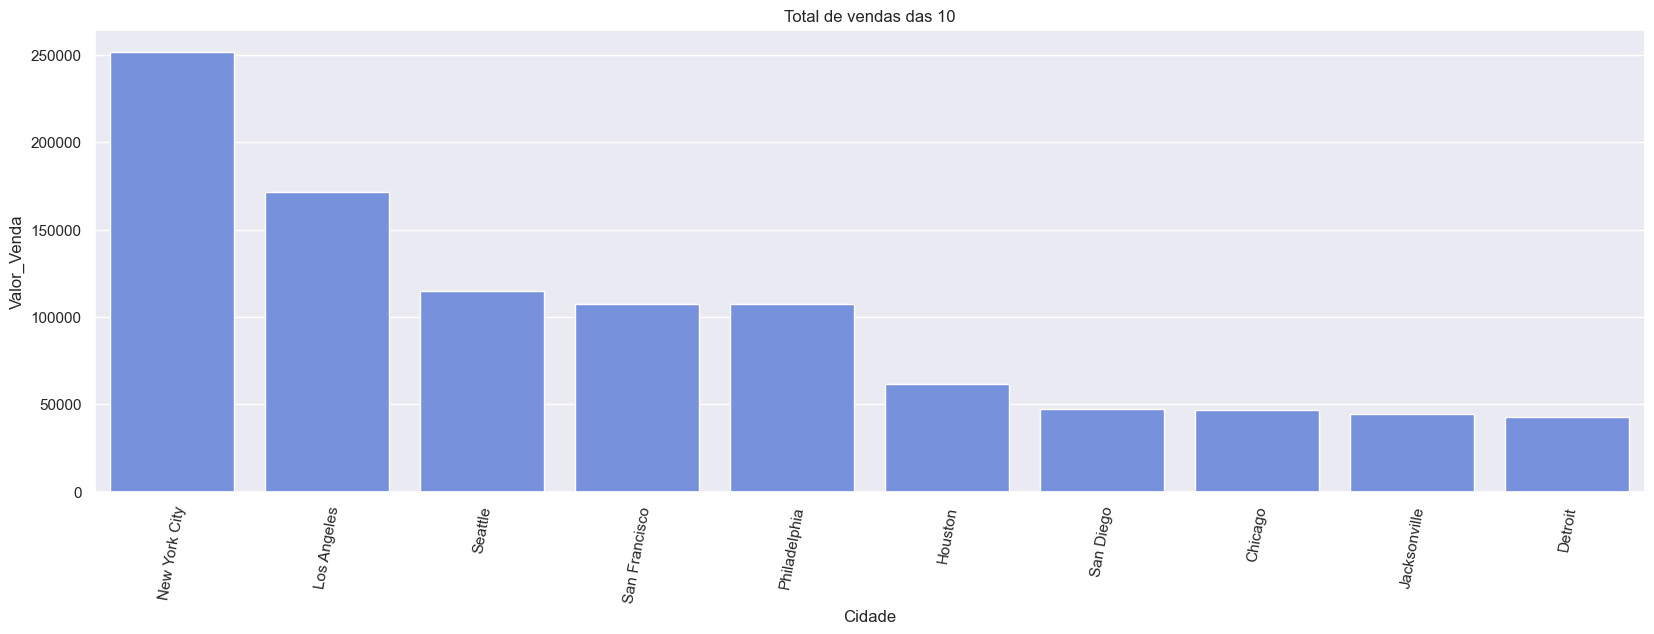

In [262]:
#Plot
plt.figure(figsize=(20, 6))
sns.set_palette('coolwarm') #definindo uma palete de cores
sns.barplot(data = df_dsa_p4,
            y='Valor_Venda',
            x='Cidade').set(title='Total de vendas das 10')
plt.xticks(rotation= 80)
plt.show()

Pergunta Negocio Numero 5
Qual Seguimento teve o MAIOR TOTAL DE VENDAS
Domoste o resultado atraves de um grafico de pizza


In [263]:
#Agrupar por sguimento e calcular o total de vendas
df_dsa_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)

In [264]:
df_dsa_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [265]:
#funcao para coverter os dados em valor absoluto
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(np.round(pct * total / 100))
    return f'{pct:.1f}%\n({val})'
  return my_format

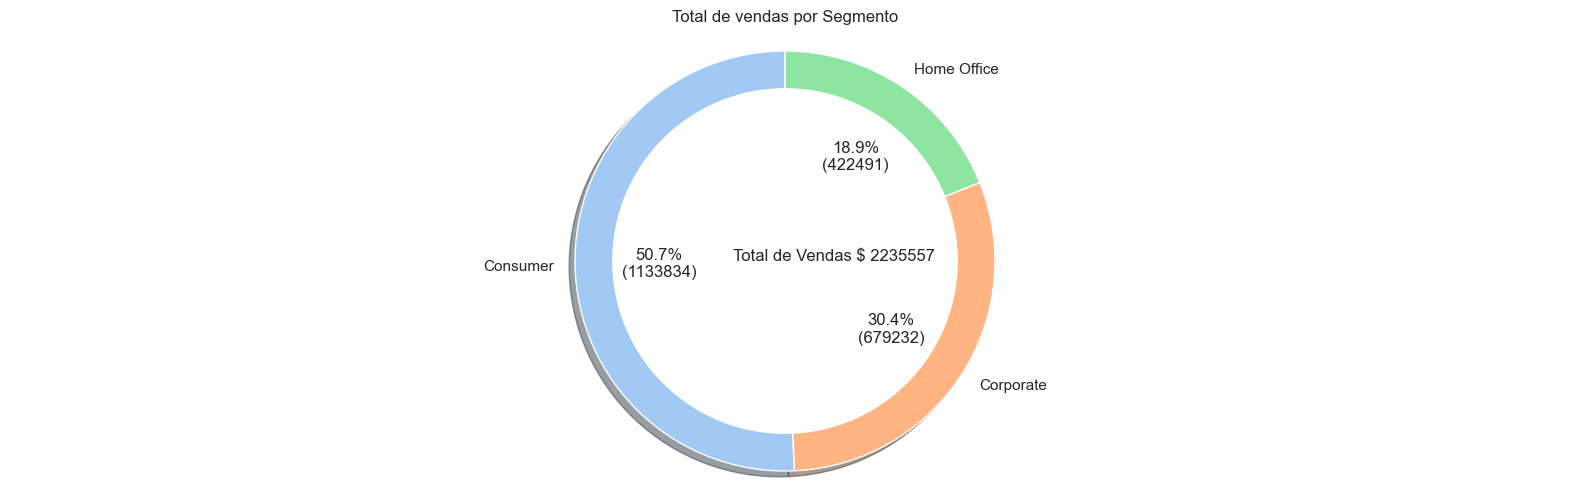

In [266]:
#Plot
#Tamanho da figura
plt.figure(figsize=(20, 6))
#grafico de pizza
plt.pie(df_dsa_p5['Valor_Venda'],
        labels= df_dsa_p5['Segmento'],
        autopct=autopct_format(df_dsa_p5['Valor_Venda']),
        startangle=90,
        shadow=True,
        colors=sns.color_palette('pastel')[0:5])
plt.axis('equal') #para o grafico ficar redondo

#Limpa o circulo centarl
centre_circule = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circule)

#labels e anotações
plt.annotate(text= 'Total de Vendas' + ' $ ' + str(int(sum(df_dsa_p5['Valor_Venda']))), xy=(-0.25, 0))
plt.title('Total de vendas por Segmento')
plt.show()


Pergunta de Negocio Numero 6
Qual Total de Vendas Por Segmento Por Ano

In [267]:
#Cnvertemos a coluna de data para o tipo datetime para obter o formato correto
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst=True) #dayfirts estamos a dizer que na formato dd/mm/aaaa o dia vem primeiro

In [268]:
df_dsa.dtypes #verificando o tipo de dado

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [269]:
#Etraimos o ano criando uma nova coluna
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

In [270]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [271]:
#Total de vendas por segmento e por ano
df_dsa_p6 = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [272]:
df_dsa_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

Pergunta de Negocio 7 /
Os gestores da empresa estao considerado conceder diferentes faixas de descontos e gostariam de fazer uma simulacao com base na regra abaixo
##Se o Valor_Venda for maior 1000 recebe 15% de desconto
##Se o Valor_Venda for menor que 1000 recebe 10% de desconto
Quantas vendas receberiam 15% de descontos?

In [273]:
#cria uma nova coluna de acordoco com a regra defeinida
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

In [274]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [275]:
#Total por cada valor da venda
df_dsa['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [276]:
print('No Total 457 vendas receberiam desconto de 15%')

No Total 457 vendas receberiam desconto de 15%


Pergunta de Negcio 8 / Considere que a Empresa decida conceder o desconto de 15% do item Anterior. Qual Seria a Media do Valor de venda antes e depois do desconto?

In [277]:
#criamos uma coluna calculando o valor da venda menos o desconto
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])

In [278]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [279]:
#filtrando as vendas antes do desconto de 15%
df_dsa_p8_vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

In [280]:
#filtrando as vendas depois do desconto de 15%
df_dsa_p8_vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [281]:
#calculando a media de vendas antes do desconto 15%
media_vendas_antes_desconto = df_dsa_p8_vendas_antes_desconto.mean()
print(f'Média de vendas antes do desconto de 15%: {media_vendas_antes_desconto:.2f}')
#calculando a media de vendas depois do desconto 15%
media_vendas_depois_desconto = df_dsa_p8_vendas_depois_desconto.mean()
print(f'Média de vendas depois do desconto de 15%: {media_vendas_depois_desconto:.2f}')

Média de vendas antes do desconto de 15%: 2116.81
Média de vendas depois do desconto de 15%: 1799.29


Pergunta de Negocio N9
Qual media de vendas por seguimento, Por Ano e Por Mes
#Demostre o resultado pelo grafico de ilha

In [282]:
#Extraimos o mes e gravamos em uma nova coluna
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month

In [283]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [284]:
df_dsa_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento']) ['Valor_Venda'].agg([np.sum, np.mean, np.median])

/var/folders/y8/rvl4_fvn35b107xh08dhj9gw0000gn/T/ipykernel_2233/1362608309.py:1: FutureWarning: The provided callable <function sum at 0x10d7ae7a0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_dsa_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento']) ['Valor_Venda'].agg([np.sum, np.mean, np.median])
/var/folders/y8/rvl4_fvn35b107xh08dhj9gw0000gn/T/ipykernel_2233/1362608309.py:1: FutureWarning: The provided callable <function mean at 0x10d7af880> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_dsa_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento']) ['Valor_Venda'].agg([np.sum, np.mean, np.median])
/var/folders/y8/rvl4_fvn35b107xh08dhj9gw0000gn/T/ipykernel_2233/1362608309.py:1: FutureWarning: The provided callable <function median at 0x113932f

In [285]:
df_dsa_p9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [286]:
#vamos extrair os niveis
anos = df_dsa_p9.index.get_level_values(0)
meses = df_dsa_p9.index.get_level_values(1)
segmentos = df_dsa_p9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

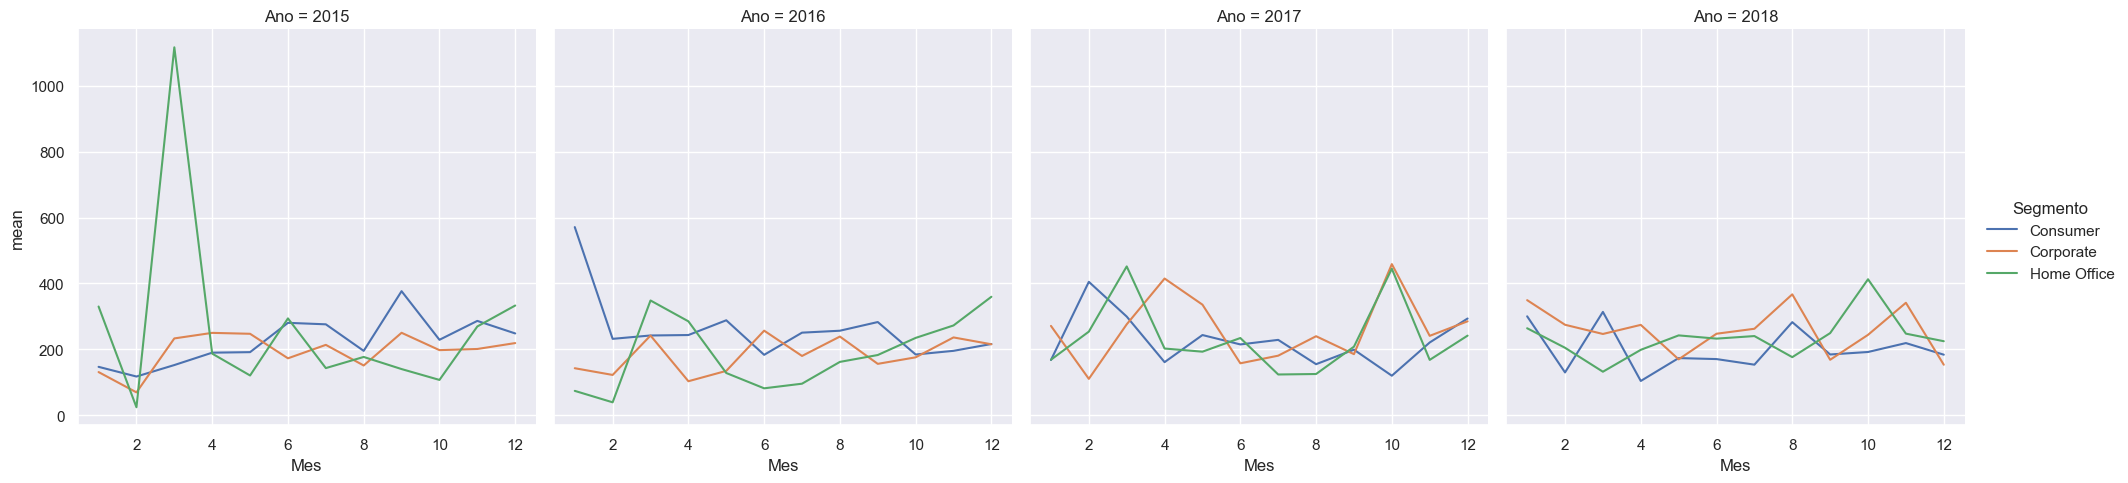

In [287]:

#Plot
plt.figure(figsize=(12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
    data = df_dsa_p9,
    x = meses,
    y = 'mean',
    hue = segmentos,
    col = anos,
    col_wrap=  4,
) #grafico relpolt representa a relacao entre duas ou mais variaveis
plt.show()

Pergunta de Negocio Numero 10
Qual o Total de vendas por categoria e subcategoria considernado Somente as TOP 12 Subcategoria?
Demostre tudo em unico grafico

In [288]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [290]:
#Agrupando por categoria e subcategoria e calaculamos a soma somente para variaveis numericas
df_dsa_p10 = df_dsa.groupby(['Categoria', 'SubCategoria']).sum(numeric_only= True).sort_values('Valor_Venda', ascending= False).head(12)

In [292]:
#Covertemos a coluna valor_venda em numero inteiro e classificamos por categoria
df_dsa_p10=df_dsa_p10[['Valor_Venda']].astype(int).sort_values(by='Categoria').reset_index()
df_dsa_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [297]:
#Criamos outro dataframe somente com totais por categoria
df_dsa_p10_categoria = df_dsa_p10.groupby(['Categoria']).sum(numeric_only= True).reset_index()

In [298]:
df_dsa_p10_categoria

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [299]:
#Lista de cores para categoria
cores_categorias = ['#FF9999', '#66B3FF', '#99FF99']

In [300]:
#Lista de cores para subcategoria
cores_subcategorias = ['#FF9999', '#66B3FF', '#99FF99', '#e65e68', '#26c958', '#FFCC99', '#aa8cd4', '#26c9a4', '#ffb74d', '#ff8a65', '#90caf9', '#81c784']

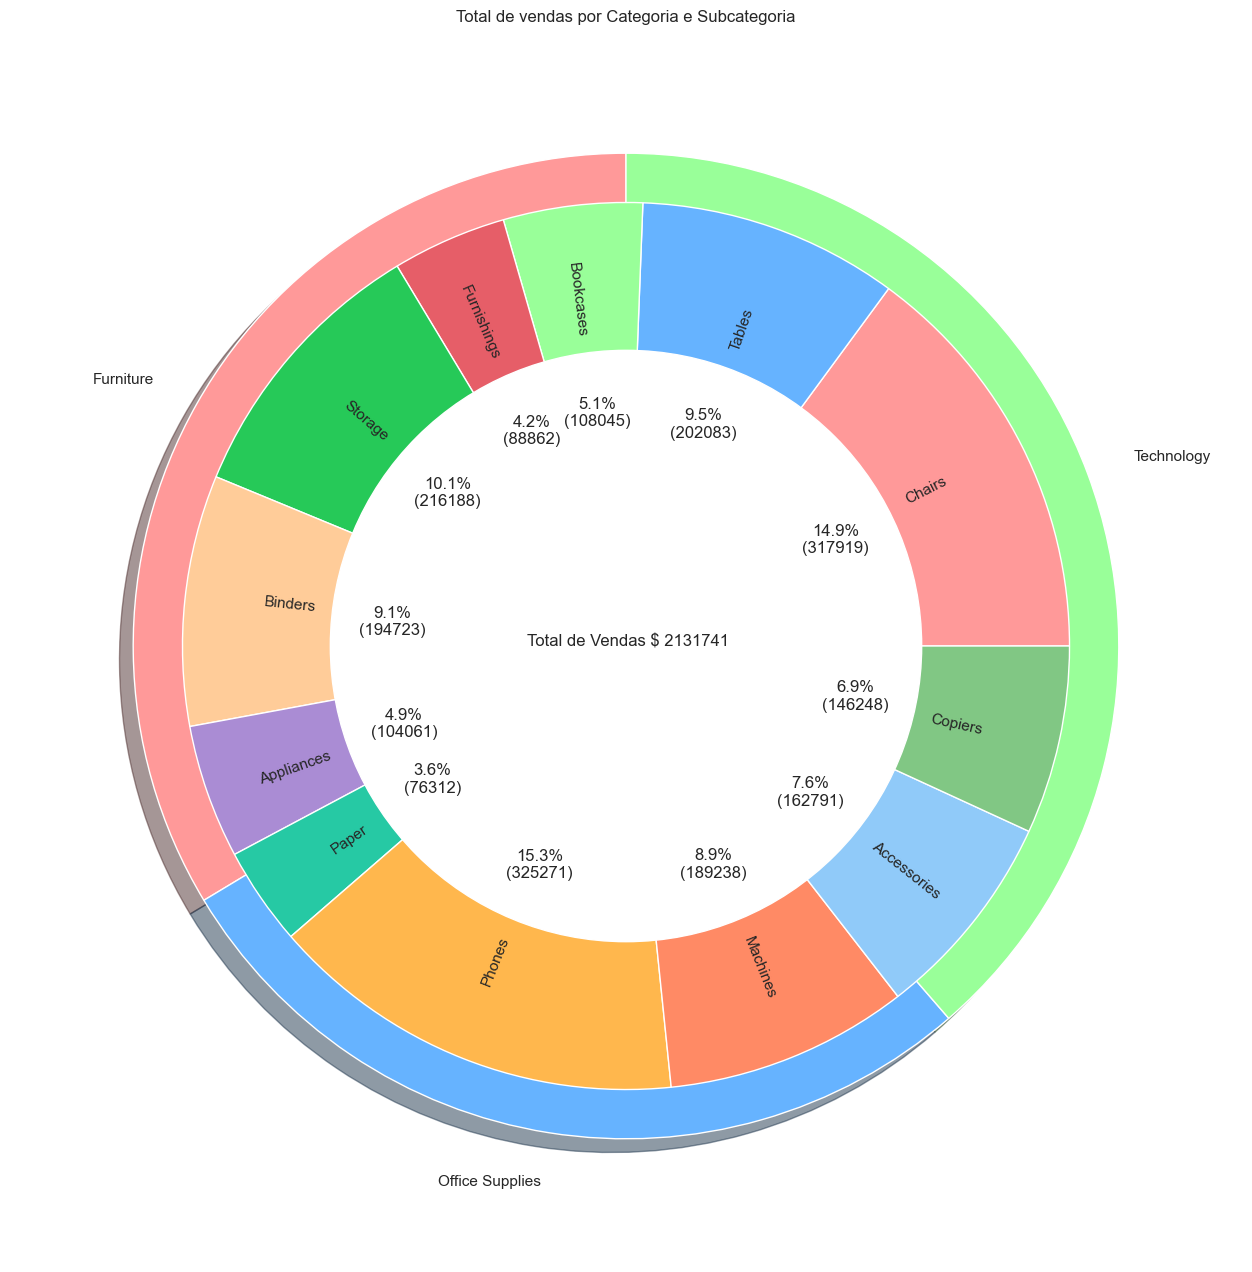

In [315]:
#Plot
#Tamanho da figura
fig, ax = plt.subplots(figsize=(20, 16))

#Grafico categorias
p1 = ax.pie(df_dsa_p10_categoria['Valor_Venda'],
        labels= df_dsa_p10_categoria['Categoria'],
       # autopct=autopct_format(df_dsa_p10_categoria['Valor_Venda']),
        startangle=90,
        shadow=True,
        wedgeprops = dict(edgecolor='white'),
        colors=cores_categorias)

#Grafico subcategorias
p2 = ax.pie(df_dsa_p10['Valor_Venda'],
        radius=0.9,
        labels= df_dsa_p10['SubCategoria'],
        autopct=autopct_format(df_dsa_p10['Valor_Venda']),
        colors=cores_subcategorias,
        labeldistance=0.7,
        wedgeprops = dict(edgecolor='white'),
        pctdistance=0.53,
        rotatelabels=True,
        shadow=True,
        )
#Limpa o circulo centarl
centre_circule = plt.Circle((0, 0), 0.6, fc='white')
#Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circule)
plt.annotate(text= 'Total de Vendas' + ' $ ' + str(int(sum(df_dsa_p10['Valor_Venda']))), xy=(-0.2, 0))
plt.title('Total de vendas por Categoria e Subcategoria')
plt.show()